In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

### Importação e tratamento auxiliar dos dados

In [2]:
data = pd.read_csv('instancias modelos/dataset_2T23_22.csv', index_col=0)
data

,1T_Dívida Líquida,1T_EBIT,1T_Lucro Líquido,1T_ROE,1T_Receita Líquida,2T_Dívida Líquida,2T_EBIT,2T_Lucro Líquido,2T_ROE,2T_Receita Líquida,Classificação
Empresa,,,,,,,,,,,
PETR4 - 2022,1.898480e+11,6.539800e+10,4.478300e+10,10.26,1.416410e+11,1.803670e+11,9.643400e+10,5.448400e+10,13.23,1.709600e+11,1
OIBR3 - 2022,2.854196e+10,-3.693700e+08,1.783950e+09,172.14,2.486940e+09,1.616768e+10,-6.114000e+08,-3.206600e+08,-41.52,2.579520e+09,1
B3SA3 - 2022,-5.093250e+09,1.430770e+09,1.101040e+09,5.05,2.284700e+09,-2.477130e+09,1.399600e+09,1.092280e+09,5.29,2.241630e+09,1
ITSA4 - 2022,4.888000e+09,4.167000e+09,3.859000e+09,5.67,2.131000e+09,5.137000e+09,3.270000e+09,3.181000e+09,4.56,2.214000e+09,1
ABEV3 - 2022,-1.124731e+10,4.162330e+09,3.528840e+09,4.32,1.843915e+10,-1.246893e+10,4.034080e+09,3.064050e+09,3.44,1.798900e+10,1
...,...,...,...,...,...,...,...,...,...,...,...
BAHI3 - 2023,1.771930e+08,-7.610000e+06,-1.787200e+07,-30.31,8.677900e+07,1.673060e+08,1.138000e+06,-1.412700e+07,-22.00,1.009340e+08,0
NEXP3 - 2023,4.833700e+07,-1.329800e+07,-1.784300e+07,-18.42,3.006600e+07,5.018700e+07,2.646400e+07,2.987100e+07,-23.20,3.742000e+07,0
EMAE4 - 2023,-4.473750e+08,1.038000e+06,1.888200e+07,1.65,1.375520e+08,-4.688340e+08,1.028100e+07,3.784800e+07,3.39,1.387540e+08,0


In [3]:
print(data['Classificação'].value_counts())
#Retire 45 linhas de classificacao = 0
data = data.drop(data[data.Classificação == 0].sample(45).index)
data['Classificação'].value_counts()

0    208
1    163
Name: Classificação, dtype: int64


1    163
0    163
Name: Classificação, dtype: int64

In [4]:
X = np.array(data.drop(['Classificação'], axis = 1))
Y = np.array(data['Classificação'])

### Separando em treino, validação e teste

In [5]:
RANDOM_STATE = 3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=RANDOM_STATE,test_size=0.2)

# Separando os dados de treino em treino e validação
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, random_state=RANDOM_STATE,test_size=0.2)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

### Criando a arvore

Ein: 0.0192
Eout: 0.3636
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        33
           1       0.65      0.61      0.62        33

    accuracy                           0.64        66
   macro avg       0.64      0.64      0.64        66
weighted avg       0.64      0.64      0.64        66

--> acc_train - acc_val = 0.3462


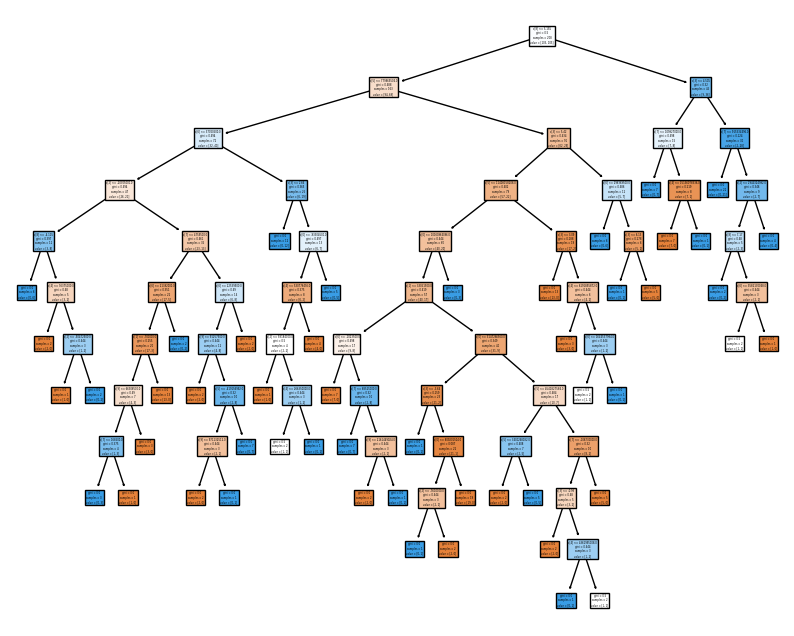

In [27]:
# Create the decision tree model
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Fit the model to the training data
clf = model.fit(X_train, Y_train)

# Obtendo a acuracia usando accuracy_score()
print('Ein: %0.4f' % (1 - accuracy_score(Y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(Y_test, clf.predict(X_test))))
print(classification_report(Y_test, clf.predict(X_test)))

plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)
plt.show()


### Coletando um conjunto de alphas a partir de uma amostra

ccp_alphas[-1]: 0.0


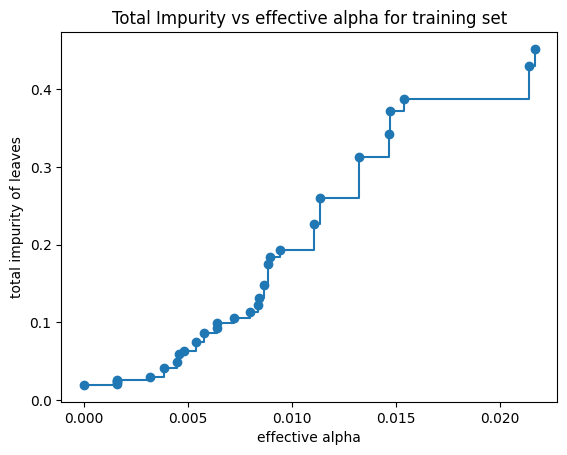

In [35]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

--> Best score: 0.692308
--> Best alpha: 0.0214342949


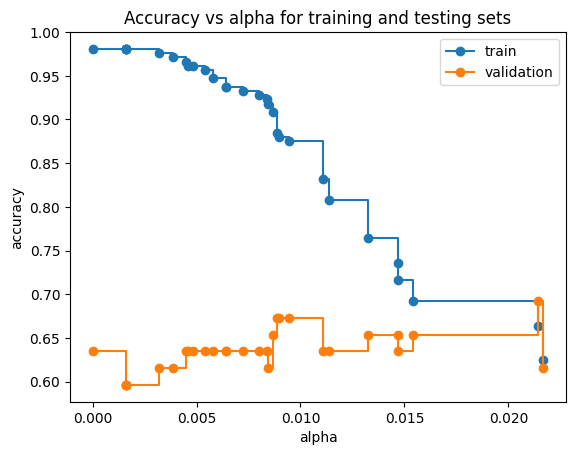

In [29]:
# Loop para treinar uma árvore de decisão para cada valor de ccp_alpha
trees = []
for alpha in ccp_alphas:
    # Criação do classificador de árvore de decisão com o valor de ccp_alpha atual
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)
    
    # Treinamento do classificador com os dados de treinamento
    clf.fit(X_train, Y_train)
    
    # Adiciona a árvore treinada à lista de árvores
    trees.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in trees]
val_scores = []

best_score = 0
best_alpha = 1

for i in range(len(trees)):
    score = trees[i].score(X_val, Y_val)
    val_scores.append(score)
    if score > best_score:
        best_score = score
        best_alpha = ccp_alphas[i]

print(f'--> Best score: {best_score:.6f}')
print(f'--> Best alpha: {best_alpha:.10f}')

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

Ein: 0.3365
Eout: 0.4242
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        33
           1       0.57      0.61      0.59        33

    accuracy                           0.58        66
   macro avg       0.58      0.58      0.58        66
weighted avg       0.58      0.58      0.58        66



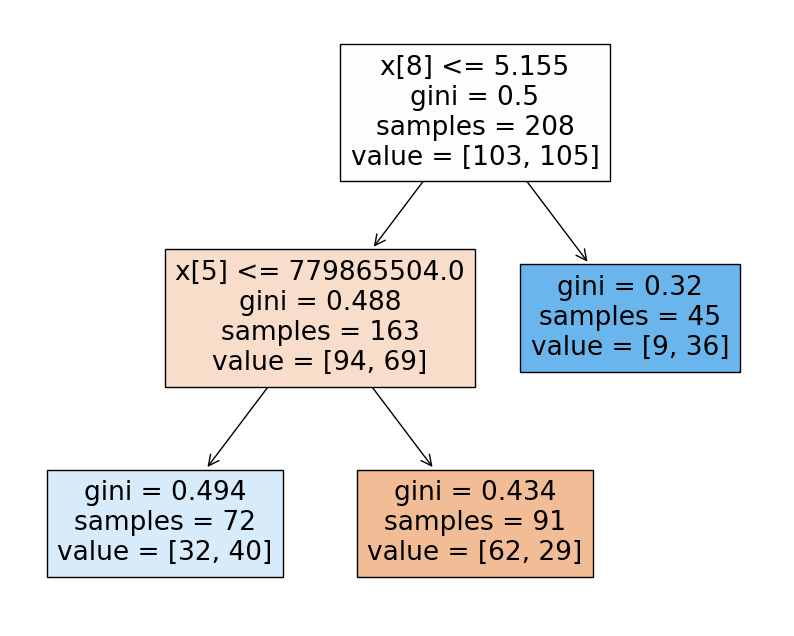

In [31]:
# Create the decision tree model
model = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=best_alpha)

# Fit the model to the training data
clf = model.fit(X_train, Y_train)

print('Ein: %0.4f' % (1 - accuracy_score(Y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(Y_test, clf.predict(X_test))))
print(classification_report(Y_test, clf.predict(X_test)))
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)
plt.show()

### Eliminando o Overfitting usando Kfold e alphas de cada fold para obter a melhor Arvore de decisão

Average Accuracy: 0.5673679653679652
Ein: 0.3743
Eout: 0.2381
best_acc: 0.7619
best_alpha: 0.0227042383


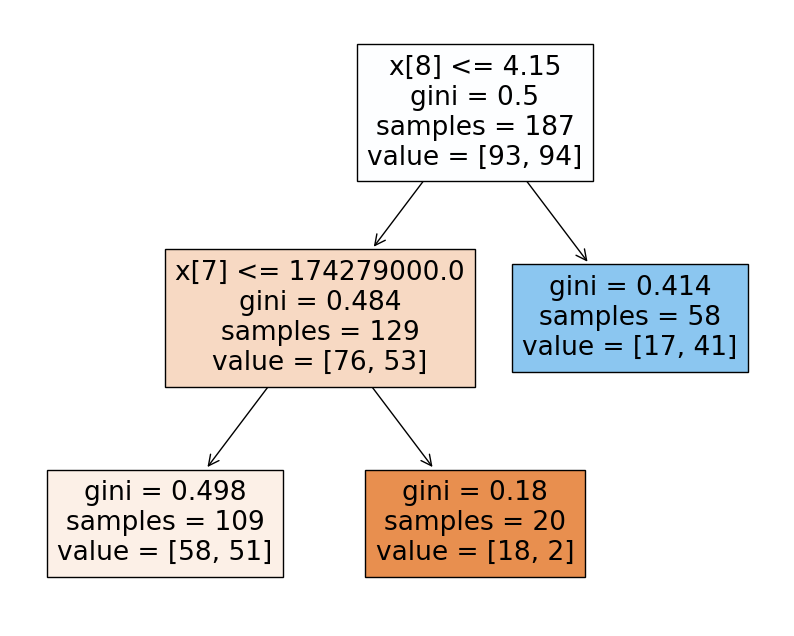

In [37]:
RANDOM_STATE = 3
best_acc = 0

# Garante que cada fold esteja balanceado
skf = StratifiedKFold(n_splits=10, shuffle=True)

# Inicializa a lista de armazenar os acurácias de cada fold
accuracies = []

# Executa a validação para cada fold
for train_index, test_index in skf.split(X_train, Y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = Y_train[train_index], Y_train[test_index]

    # Calcula o caminho de custo-complexidade para cada fold e armazena os valores de ccp_alpha
    path = clf.cost_complexity_pruning_path(X_train_fold, y_train_fold)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    for alpha in ccp_alphas:
        # Cria a arquitetura da arvore
        model = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)

        # Treina o modelo
        clf = model.fit(X_train_fold, y_train_fold)

        # Avalia o modelo
        accuracy = accuracy_score(y_test_fold, clf.predict(X_test_fold))
        accuracies.append(accuracy)
        
        # Salva o melhor modelo
        if accuracy > best_acc:
            best_acc = accuracy
            best_model = clf
            best_alpha = alpha
            Ein = 1 - accuracy_score(y_train_fold, clf.predict(X_train_fold))
            Eout = 1 - accuracy


# Calcula a acurácia média
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

print('Ein: %0.4f' % Ein)
print('Eout: %0.4f' % Eout)
print('best_acc: %0.4f' % best_acc)
print('best_alpha: %0.10f' % best_alpha)
#print(classification_report(y_test_fold, clf.predict(X_test_fold)))
plt.figure(figsize=(10, 8))
plot_tree(best_model, filled=True)
plt.show()
    